# Euthanasia Factors Analysis

## Initial Data Reading, Cleaning, Combining

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math
from sklearn import cluster
from sklearn.decomposition import PCA
import re
from scipy import stats

In [2]:
s16 = pd.read_excel("Behavior Euthanasia 2016-2020.xlsx", sheet_name = '2016')
s17 = pd.read_excel("Behavior Euthanasia 2016-2020.xlsx", sheet_name = '2017')
s18 = pd.read_excel("Behavior Euthanasia 2016-2020.xlsx", sheet_name = '2018')
s19 = pd.read_excel("Behavior Euthanasia 2016-2020.xlsx", sheet_name = '2019')
s20 = pd.read_excel("Behavior Euthanasia 2016-2020.xlsx", sheet_name = '2020')
s16 = s16.loc[~s16.index.duplicated(keep='first')]
s17 = s17.loc[~s17.index.duplicated(keep='first')]
s18 = s18.loc[~s18.index.duplicated(keep='first')]
s19 = s19.loc[~s19.index.duplicated(keep='first')]
s20 = s20.loc[~s20.index.duplicated(keep='first')]

sframes = [s16, s17, s18, s19, s20]

In [3]:
a16 = pd.read_excel("Behavior Adoption 2016-2020 (1).xlsx", sheet_name = '2016')
a17 = pd.read_excel("Behavior Adoption 2016-2020 (1).xlsx", sheet_name = '2017')
a18 = pd.read_excel("Behavior Adoption 2016-2020 (1).xlsx", sheet_name = '2018')
a19 = pd.read_excel("Behavior Adoption 2016-2020 (1).xlsx", sheet_name = '2019')
a20 = pd.read_excel("Behavior Adoption 2016-2020 (1).xlsx", sheet_name = '2020')
a16 = a16.loc[~a16.index.duplicated(keep='first')]
a17 = a17.loc[~a17.index.duplicated(keep='first')]
a18 = a18.loc[~a18.index.duplicated(keep='first')]
a19 = a19.loc[~a19.index.duplicated(keep='first')]
a20 = a20.loc[~a20.index.duplicated(keep='first')]

aframes = [a16, a17, a18, a19, a20]
adoption = pd.concat(aframes, sort = False).set_index('A#')
adoption.head()
ad = adoption.iloc[:,0:9]
ad['Status'] = 'adoption'
ad['source'] = adoption['source']
ad.head()

,Outcome date,name,Breedtype,gender,weight,age,main reason,Code 1,secondary reason,Status,source
A#,,,,,,,,,,,
33809028,2017-01-02,Diva,dobie,FS,24.5kg,4y,leash reactive,4.0,rjm,adoption,merced
34204286,2017-01-10,Dude,shih tzu,MN,9.9kg,9y,fearful,3.0,handling sensitivity - skin issues,adoption,acc
33867509,2016-12-27,Ariel,shepherd,FS,16.55kg,3y,fearful,3.0,escape behaviors,adoption,fresno
17160361,2016-12-23,Rusty,chi,MN,7.75kg,5y,fearful of strangers,3.0,NaN,adoption,ACC
33698313,2016-12-26,Elmer,spaniel,MN,8.6kg,5y,lelash reactive - dogs and people,4.0,NaN,adoption,ACC


In [4]:
t16 = pd.read_excel("Behavior Transfer 2016-2020 (1).xlsx", sheet_name = '2016')
t17 = pd.read_excel("Behavior Transfer 2016-2020 (1).xlsx", sheet_name = '2017')
t18 = pd.read_excel("Behavior Transfer 2016-2020 (1).xlsx", sheet_name = '2018')
t19 = pd.read_excel("Behavior Transfer 2016-2020 (1).xlsx", sheet_name = '2019')
t20 = pd.read_excel("Behavior Transfer 2016-2020 (1).xlsx", sheet_name = '2020')
t16 = t16.loc[~t16.index.duplicated(keep='first')]
t17 = t17.loc[~t17.index.duplicated(keep='first')]
t18 = t18.loc[~t18.index.duplicated(keep='first')]
t19 = t19.loc[~t19.index.duplicated(keep='first')]
t20 = t20.loc[~t20.index.duplicated(keep='first')]
tframes = [t16, t17, t18, t19, t20]
transfer = pd.concat(tframes, sort = False).set_index('AnimalNumber')
transfer.head()

tf = transfer.iloc[:,0:8]
tf['secondary reason'] = transfer['secondary reason']
tf['Status'] = 'transfer'
tf['source'] = transfer['source']
tf.head()

,Outcome Date,AnimalName,PrimaryBreed,Gender,Weight,Age,main reason,Code 1,secondary reason,Status,source
AnimalNumber,,,,,,,,,,,
A30828052,2016-10-26 12:27:00,Romy,Shepherd,FS,24kg,9mos,hand shy,3.0,reactive to children and strangers,transfer,merced
A31809294,2016-10-23 12:44:00,Gaston,"Terrier, Silky",MN,4.6kg,1yrs,aggression to dogs,2.0,aggression to people,transfer,acc
A32205137,2016-11-14 12:16:00,Reddy,Shepherd,MN,28kg,1yrs,fearful of strangers,3.0,rjm,transfer,madera
A33250347,2016-10-15 17:15:00,Little Sebastian,Terrier,MN,10.6kg,4yrs,aggression to people,1.0,NaN,transfer,fresno
A33388795,2016-11-12 16:08:00,Liam,Shepherd,MN,24.5kg,8mos,leash reactive to children and vehicles,4.0,leash reactive to dogs,transfer,fresno


In [5]:
#combine transfer and adoption datasets
ad = ad.reset_index()
tf = tf.reset_index()
ad.columns = ['animal_id', 'outcome_date', 'name', 'breed', 'gender', 'weight', 'age', 'reason1', 'code1', 'reason2', 'Status', 'source'] 
tf.columns = ['animal_id', 'outcome_date', 'name', 'breed', 'gender', 'weight', 'age', 'reason1', 'code1', 'reason2', 'Status', 'source'] 

adtr_frames = [ad, tf]
adtr = pd.concat(adtr_frames, sort=False)


In [6]:
adtr.set_index('animal_id')

,outcome_date,name,breed,gender,weight,age,reason1,code1,reason2,Status,source
animal_id,,,,,,,,,,,
33809028,2017-01-02 00:00:00,Diva,dobie,FS,24.5kg,4y,leash reactive,4.0,rjm,adoption,merced
34204286,2017-01-10 00:00:00,Dude,shih tzu,MN,9.9kg,9y,fearful,3.0,handling sensitivity - skin issues,adoption,acc
33867509,2016-12-27 00:00:00,Ariel,shepherd,FS,16.55kg,3y,fearful,3.0,escape behaviors,adoption,fresno
17160361,2016-12-23 00:00:00,Rusty,chi,MN,7.75kg,5y,fearful of strangers,3.0,NaN,adoption,ACC
33698313,2016-12-26 00:00:00,Elmer,spaniel,MN,8.6kg,5y,lelash reactive - dogs and people,4.0,NaN,adoption,ACC
...,...,...,...,...,...,...,...,...,...,...,...
A43298745,2019-12-15 13:23:00,Bryce,Retriever,MN,35kg,4yrs,leash reactive,4.0,NaN,transfer,fresno
A24091168,2020-01-17 08:52:00,Canelo,"Chihuahua, Short Coat",MN,3.8kg,5yrs,leash reactivity,4.0,aggression human,transfer,stockton
A43336444,2020-01-26 19:27:00,Skinner,Shepherd,MN,29.5kg,3yrs,leash reactivity,4.0,NaN,transfer,fresno


In [7]:
sf = pd.concat(sframes, sort = False).reset_index()
sf = sf[sf.columns.drop(list(sf.filter(regex='Column')))]
sf = sf[sf.columns.drop(list(sf.filter(regex='intake_reason')))]
sf = sf.dropna(axis=0, how ='all')
sf = sf.dropna(axis=1, how = 'all')

sf.columns

Index(['index', 'date_of_death', 'animal_id', 'name', 'breed_type', 'gender',
       'weight', 'age', 'reason1', 'code1', 'reason2', 'code2', 'meds',
       'source ', 'intake_date ', 'adoption_date ', 'return_date_1',
       'adoption_date_2', 'return_date_2', 'adoption_date_3', 'return_date_3',
       'adoption_date_4', 'return_date_4'],
      dtype='object')

In [8]:
# adoptCols = list(sf.filter(regex='adoption').columns)
# returnCols = list(sf.filter(regex='return').columns)
# dateTimeCols = adoptCols + returnCols
# dateTimeCols.append('intake_date ')
# dateTimeCols.append('date_of_death')

# for c in dateTimeCols:
#     sf[c] = pd.to_datetime(sf[c])
    
sf['weight'] = sf['weight'].str.extract('(\d+)', expand=False)

In [9]:
for val in range(0, len(sf.age)):
    if "m" in sf.age[val]:
        sf.age[val] = int(re.sub("[^0-9]",'', sf.age[val]))/12
    else:
        sf.age[val] = int(re.sub("[^0-9]", "", sf.age[val]))


C:\Users\zapcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\zapcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
sf["code1"] = sf["code1"].astype('Int64')
sf["code2"] = sf["code2"].astype('Int64')

In [11]:
sf[["animal_id", "name", "breed_type", "gender", "reason1", "reason2", "code1", "code2", "meds", "source"]] = sf[["animal_id", "name", "breed_type", "gender", "reason1", "reason2", "code1", "code2", "meds", "source "]].astype(object)

In [12]:
sf["Status"] = 'euthanized'
sf['source'] = sf['source'].str.lower()
sf = sf.iloc[:,1:].set_index('animal_id')
sf.head()

,date_of_death,name,breed_type,gender,weight,age,reason1,code1,reason2,code2,...,adoption_date,return_date_1,adoption_date_2,return_date_2,adoption_date_3,return_date_3,adoption_date_4,return_date_4,source,Status
animal_id,,,,,,,,,,,,,,,,,,,,,
A24933697,2016-02-17 12:04:00,Simon,Pug,M,9,2,Aggression-Human-U/U,1,NaN,NaN,...,2015-02-18,2015-04-03,2015-05-01,2016-02-13,NaT,NaT,NaT,NaT,acc,euthanized
A30629255,2016-04-17 11:50:00,Cal,"Retriever, Labrador",M,33,3,Aggression-Human-U/U,1,NaN,NaN,...,2016-02-06,2016-02-21,NaT,NaT,NaT,NaT,NaT,NaT,acc,euthanized
A30630727,2016-04-19 19:14:00,Delilah,"Terrier, Pit Bull",F,21,2,Aggression-Human-U/U,1,Aggression to dogs,2,...,2016-01-30,2016-04-17,NaT,NaT,NaT,NaT,NaT,NaT,acc,euthanized
A31254758,2016-05-06 08:39:00,Kaley,Pointer,F,13,3,Aggression-Human-U/U,1,Aggression to dogs,2,...,2016-04-15,2016-05-05,NaT,NaT,NaT,NaT,NaT,NaT,stockton,euthanized
A31529085,2016-05-18 13:51:00,Scully,Korean Jindo,U,NaN,2,Aggression-Human-U/U,1,Fearful -T/M,3,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,hsus,euthanized


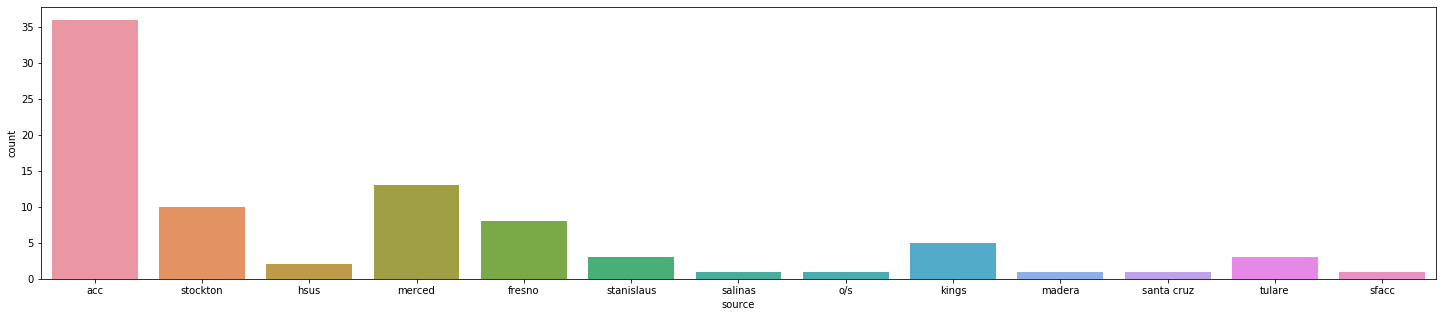

In [13]:
plt.figure(figsize = (25,5))
sns.countplot(data = sf, x = "source")

In [14]:
perc = (1-(sum(pd.isnull(sf["meds"]))/len(sf["meds"])))* 100
perc
print(f'The percentage of dogs that were on meds when they were euthanized is {round(perc)}%.')

The percentage of dogs that were on meds when they were euthanized is 38%.


In [15]:
sf['intake_adoption_diff'] = sf['adoption_date '] - sf['intake_date ']
sf['intake_adoption_diff'] = sf['intake_adoption_diff'].astype(str)
sf['intake_adoption_diff'] = sf['intake_adoption_diff'].str.extract('(\d+)', expand=False)
sf['intake_adoption_diff']

animal_id
A24933697     10
A30629255     20
A30630727     13
A31254758      9
A31529085    NaN
            ... 
44435334       9
44329330       4
41304676       4
30626956       3
45564186     NaN
Name: intake_adoption_diff, Length: 85, dtype: object

# Analysis

### Prep euth dataset

In [16]:
sf.head()

,date_of_death,name,breed_type,gender,weight,age,reason1,code1,reason2,code2,...,return_date_1,adoption_date_2,return_date_2,adoption_date_3,return_date_3,adoption_date_4,return_date_4,source,Status,intake_adoption_diff
animal_id,,,,,,,,,,,,,,,,,,,,,
A24933697,2016-02-17 12:04:00,Simon,Pug,M,9,2,Aggression-Human-U/U,1,NaN,NaN,...,2015-04-03,2015-05-01,2016-02-13,NaT,NaT,NaT,NaT,acc,euthanized,10
A30629255,2016-04-17 11:50:00,Cal,"Retriever, Labrador",M,33,3,Aggression-Human-U/U,1,NaN,NaN,...,2016-02-21,NaT,NaT,NaT,NaT,NaT,NaT,acc,euthanized,20
A30630727,2016-04-19 19:14:00,Delilah,"Terrier, Pit Bull",F,21,2,Aggression-Human-U/U,1,Aggression to dogs,2,...,2016-04-17,NaT,NaT,NaT,NaT,NaT,NaT,acc,euthanized,13
A31254758,2016-05-06 08:39:00,Kaley,Pointer,F,13,3,Aggression-Human-U/U,1,Aggression to dogs,2,...,2016-05-05,NaT,NaT,NaT,NaT,NaT,NaT,stockton,euthanized,9
A31529085,2016-05-18 13:51:00,Scully,Korean Jindo,U,NaN,2,Aggression-Human-U/U,1,Fearful -T/M,3,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,hsus,euthanized,NaN


In [17]:
sf.source

animal_id
A24933697         acc
A30629255         acc
A30630727         acc
A31254758    stockton
A31529085        hsus
               ...   
44435334          acc
44329330       fresno
41304676       tulare
30626956       merced
45564186          acc
Name: source, Length: 85, dtype: object

In [18]:
euth = sf.reset_index().iloc[:,0:10]
euth['source'] = sf.reset_index()['source']
                             
euth['source']

euth.columns = ['animal_id', 'outcome_date', 'name', 'breed', 'gender', 'weight', 'age', 'reason1', 'code1', 'reason2', 'source']

euth['Status'] = 'euthanized'

euth = euth.reset_index()

euth.head()

,index,animal_id,outcome_date,name,breed,gender,weight,age,reason1,code1,reason2,source,Status
0,0,A24933697,2016-02-17 12:04:00,Simon,Pug,M,9,2,Aggression-Human-U/U,1,NaN,acc,euthanized
1,1,A30629255,2016-04-17 11:50:00,Cal,"Retriever, Labrador",M,33,3,Aggression-Human-U/U,1,NaN,acc,euthanized
2,2,A30630727,2016-04-19 19:14:00,Delilah,"Terrier, Pit Bull",F,21,2,Aggression-Human-U/U,1,Aggression to dogs,acc,euthanized
3,3,A31254758,2016-05-06 08:39:00,Kaley,Pointer,F,13,3,Aggression-Human-U/U,1,Aggression to dogs,stockton,euthanized
4,4,A31529085,2016-05-18 13:51:00,Scully,Korean Jindo,U,NaN,2,Aggression-Human-U/U,1,Fearful -T/M,hsus,euthanized


In [19]:
adtr = adtr.reset_index()
adtr.head()

,index,animal_id,outcome_date,name,breed,gender,weight,age,reason1,code1,reason2,Status,source
0,0,33809028,2017-01-02,Diva,dobie,FS,24.5kg,4y,leash reactive,4.0,rjm,adoption,merced
1,1,34204286,2017-01-10,Dude,shih tzu,MN,9.9kg,9y,fearful,3.0,handling sensitivity - skin issues,adoption,acc
2,2,33867509,2016-12-27,Ariel,shepherd,FS,16.55kg,3y,fearful,3.0,escape behaviors,adoption,fresno
3,3,17160361,2016-12-23,Rusty,chi,MN,7.75kg,5y,fearful of strangers,3.0,NaN,adoption,ACC
4,4,33698313,2016-12-26,Elmer,spaniel,MN,8.6kg,5y,lelash reactive - dogs and people,4.0,NaN,adoption,ACC


### Clean up adtr dataset

In [20]:
adtr['code1'] = adtr['code1'].astype('Int64')

In [21]:
adtr['age'] = adtr['age'].astype(str)

In [22]:
for val in range(0, len(adtr.age)):
    if "m" in adtr.age[val]:
        numeric_filter = filter(str.isdigit, adtr.age[val])
        adtr.age[val] = int("".join(numeric_filter))/12
    elif "y" in adtr.age[val]:
        numeric_filter = filter(str.isdigit, adtr.age[val])
        adtr.age[val] = int("".join(numeric_filter))
    else:
        continue

C:\Users\zapcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\zapcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [23]:
adtr = adtr.drop(adtr.index[376]).reset_index()
adtr['age'] = pd.to_numeric(adtr['age'])

In [24]:
adtr['weight'] = adtr['weight'].str.extract('(\d+)', expand=False)

In [25]:
euth['weight'] = pd.to_numeric(euth['weight'])
adtr['weight'] = pd.to_numeric(adtr['weight'])

euth.head()

,index,animal_id,outcome_date,name,breed,gender,weight,age,reason1,code1,reason2,source,Status
0,0,A24933697,2016-02-17 12:04:00,Simon,Pug,M,9.0,2,Aggression-Human-U/U,1,NaN,acc,euthanized
1,1,A30629255,2016-04-17 11:50:00,Cal,"Retriever, Labrador",M,33.0,3,Aggression-Human-U/U,1,NaN,acc,euthanized
2,2,A30630727,2016-04-19 19:14:00,Delilah,"Terrier, Pit Bull",F,21.0,2,Aggression-Human-U/U,1,Aggression to dogs,acc,euthanized
3,3,A31254758,2016-05-06 08:39:00,Kaley,Pointer,F,13.0,3,Aggression-Human-U/U,1,Aggression to dogs,stockton,euthanized
4,4,A31529085,2016-05-18 13:51:00,Scully,Korean Jindo,U,NaN,2,Aggression-Human-U/U,1,Fearful -T/M,hsus,euthanized


In [26]:
adtr.breed.value_counts()

chi                  55
shepherd             50
terrier              39
pit bull             28
retriever            28
                     ..
sheep dog             1
Italian Greyhound     1
dachshund             1
boxer                 1
min poodle            1
Name: breed, Length: 91, dtype: int64

## Comparing numeric means with t-tests

### Weight

In [27]:
adtr_weight_na = adtr.weight.dropna()
euth_weight_na = euth.weight.dropna()

t, p = stats.ttest_ind(
    adtr_weight_na.values,
    euth_weight_na.values,
    equal_var = False
)

print(f'The p-value associated with the observed value of the test statistic in a t test for weight is {p}, \nwhich is significant at the alpha level 0.05.')

The p-value associated with the observed value of the test statistic in a t test for weight is 0.002620228366928239, 
which is significant at the alpha level 0.05.


In [28]:
print(adtr_weight_na.mean(), euth_weight_na.mean())

16.448275862068964 20.107142857142858


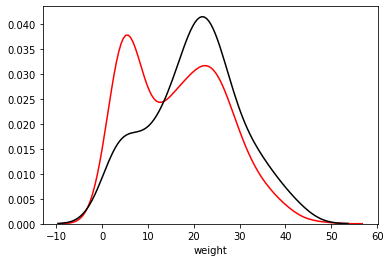

In [70]:
sns.distplot(adtr_weight_na, hist=False, color = 'red')
sns.distplot(euth_weight_na, hist = False, color = 'black')

### Age

In [29]:
adtr_age_na = adtr.age.dropna()
euth_age_na = euth.age.dropna()

t, p = stats.ttest_ind(
    adtr_age_na.values,
    euth_age_na.values,
    equal_var = False
)

print(f'The p-value associated with the observed value of the test statistic in a t test for age is {p}, \nwhich is not significant at the alpha level 0.05.')

The p-value associated with the observed value of the test statistic in a t test for age is 0.7998976460043953, 
which is not significant at the alpha level 0.05.


In [30]:
print(adtr_age_na.mean(), euth_age_na.mean())

3.1194581280788185 3.0509803921568626


In [67]:
min(adtr_age_na)

0.16666666666666666

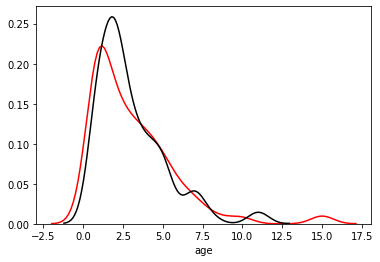

In [71]:
sns.distplot(adtr_age_na, hist = False, color = 'red')
sns.distplot(euth_age_na, hist = False, color = 'black')

## Comparing categorical variables

### Code 1

In [32]:
euth_code1_counts = euth.code1.value_counts()
euth_code1_counts

1    52
2    14
3     7
4     3
Name: code1, dtype: int64

In [33]:
adtr_code1_counts = adtr.code1.value_counts()

adtr_code1_counts = adtr_code1_counts.drop(labels=[5, 6,7])

adtr_code1_counts

3    32
1    25
4    25
2     6
Name: code1, dtype: int64

In [34]:
observed = euth_code1_counts

adtr_ratios = adtr_code1_counts / adtr_code1_counts.sum()

expected = adtr_ratios * euth_code1_counts.sum()

chi_squared_stat = (((observed-expected)**2)/expected).sum()

print(chi_squared_stat)

89.2523245614035


In [35]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 3)   # Df = number of variable categories - 1

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=3)
print("P value")
print(p_value)

Critical value
7.814727903251179
P value
0.0


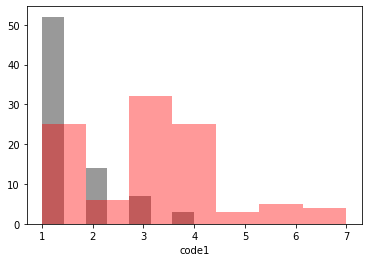

In [77]:
sns.distplot(euth.code1.dropna(), kde = False, color = 'black')
sns.distplot(adtr.code1.dropna(), kde = False, color = 'red')

### Gender

In [36]:
euth.gender.value_counts()

M     46
F     30
NM     6
U      2
SF     1
Name: gender, dtype: int64

In [37]:
adtr.gender.value_counts()

MN    216
FS    164
NM     19
SF      7
Name: gender, dtype: int64

In [38]:
for g in range(0, len(euth['gender'])):
    if 'F' in euth['gender'][g]:
        euth['gender'][g] = 'Female'
    else:
        euth['gender'][g] = 'Male'
euth['gender'].value_counts()

C:\Users\zapcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\zapcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Male      54
Female    31
Name: gender, dtype: int64

In [39]:

for g in range(0, len(adtr['gender'])):
    if 'F' in adtr['gender'][g]:
        adtr['gender'][g] = 'Female'
    else:
        adtr['gender'][g] = 'Male'
adtr['gender'].value_counts()


C:\Users\zapcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\zapcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Male      235
Female    171
Name: gender, dtype: int64

In [40]:
observed = euth.gender.value_counts()

adtr_ratios = adtr.gender.value_counts() / adtr.gender.value_counts().sum()

expected = adtr_ratios * euth.gender.value_counts().sum()

chi_squared_stat = (((observed-expected)**2)/expected).sum()

print(chi_squared_stat)

1.112092161986108


In [41]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 3)   # Df = number of variable categories - 1

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=3)
print("P value")
print(p_value)

Critical value
7.814727903251179
P value
0.7741558187750788


Text(0.5, 1.0, 'Euth')

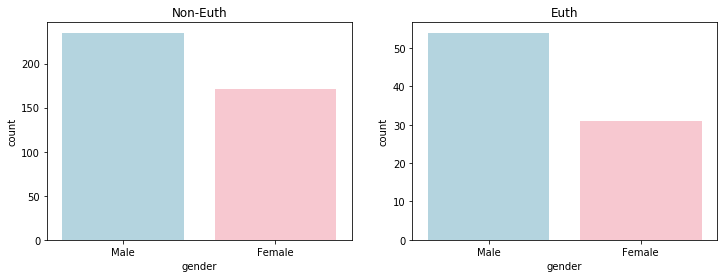

In [81]:
fig, ax = plt.subplots(1, 2, figsize = (12,4))
sns.countplot(adtr['gender'], ax = ax[0], order = ['Male', 'Female'], palette = ['lightblue', 'pink'])
sns.countplot(euth['gender'], ax = ax[1], palette = ['lightblue', 'pink'])
ax[0].set_title('Non-Euth')
ax[1].set_title('Euth')

### Source

In [43]:
adtr_source = adtr.source.dropna().reset_index().reset_index()

for i in range(0, len(adtr_source)):
    adtr_source['source'][i] = adtr_source['source'][i].lower()

adtr_source_counts = adtr_source['source'].value_counts()[0:6]

C:\Users\zapcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [44]:
euth_source = euth.source.dropna()

for i in range(0, len(euth_source)):
    euth_source[i] = euth_source[i].lower()

euth_source_counts = euth_source.value_counts()[0:6]

In [45]:
observed = euth_source_counts

adtr_ratios = adtr_source_counts / adtr_source_counts.sum()

expected = adtr_ratios * euth_source_counts.sum()

chi_squared_stat = (((observed-expected)**2)/expected).sum()

print(chi_squared_stat)

10.3580728152812


In [46]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 3)   # Df = number of variable categories - 1

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=3)
print("P value")
print(p_value)

Critical value
7.814727903251179
P value
0.015755235229313547


In [47]:
adtr_s = pd.DataFrame(adtr_source_counts).reset_index()
euth_s = pd.DataFrame(euth_source_counts).reset_index()
adtr_s.columns = ['source', 'count']
euth_s.columns = ['source', 'count']

euth_s = euth_s.sort_values('source')
adtr_s = adtr_s.sort_values('source')


In [ ]:
fig, ax = plt.subplots(2,1, figsize = (10, 10))
sns.barplot(data = adtr_s, x = 'source', y= 'count', ax = ax[0],  palette = ['lightblue', 'pink', 'teal', 'lavender', 'red', 'navy'])
sns.barplot(data = euth_s, x = 'source', y= 'count', ax = ax[1],  palette = ['lightblue', 'pink', 'teal', 'lavender', 'red', 'navy'])
ax[0].set_title('Non-Euth')
ax[1].set_title('Euth')

In [49]:
for row in range(0, len(euth_s)):
    euth_s['percentage'] = (euth_s['count'][row] / euth_s['count'].sum())
for row in range(0, len(euth_s)):
    euth_s['percentage'][row] = (euth_s['count'][row] / euth_s['count'].sum())

C:\Users\zapcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [50]:
for row in range(0, len(adtr_s)):
    adtr_s['percentage'] = (adtr_s['count'][row] / adtr_s['count'].sum())
for row in range(0, len(adtr_s)):
    adtr_s['percentage'][row] = (adtr_s['count'][row] / adtr_s['count'].sum())

C:\Users\zapcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [51]:
euth_s['percentage'] = euth_s['percentage']*100
adtr_s['percentage'] = adtr_s['percentage']*100


In [52]:
euth_s = euth_s.reset_index()
adtr_s = adtr_s.reset_index()

Text(0.5, 1.0, 'Euth')

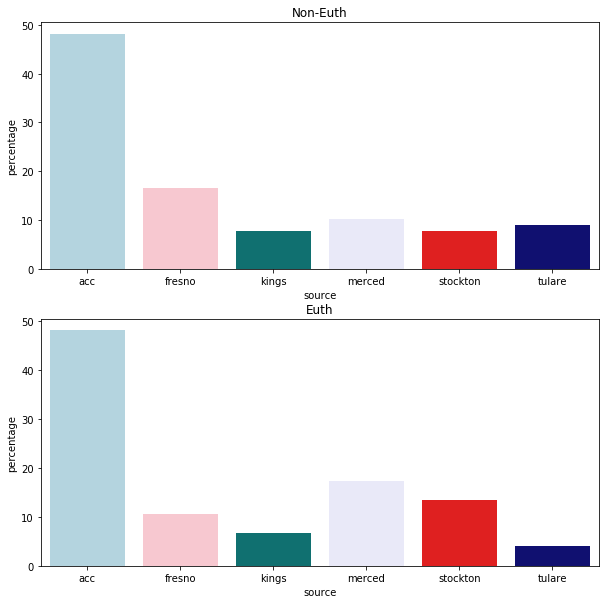

In [83]:
fig, ax = plt.subplots(2,1, figsize = (10, 10))
sns.barplot(data = adtr_s, x = 'source', y= 'percentage', ax = ax[0],  palette = ['lightblue', 'pink', 'teal', 'lavender', 'red', 'navy'])
sns.barplot(data = euth_s, x = 'source', y= 'percentage', ax = ax[1],  palette = ['lightblue', 'pink', 'teal', 'lavender', 'red', 'navy'])
ax[0].set_title('Non-Euth')
ax[1].set_title('Euth')

In [54]:
a = list(adtr_s['source'])
b = list(adtr_s['percentage'] - euth_s['percentage'])

source_differences = pd.DataFrame(b,a).reset_index()

source_differences.columns = ['Source', 'Difference(%)']

source_differences

,Source,Difference(%)
0,acc,0.093842
1,fresno,6.048876
2,kings,1.251222
3,merced,-7.069404
4,stockton,-5.415445
5,tulare,5.090909


### Breed

In [55]:
adtr_breeds = adtr['breed'].value_counts()[:10]

In [56]:
euth_breeds = euth['breed'].value_counts()[:10]

In [57]:
adtr_breeds/adtr_breeds.sum()

chi                  0.213178
shepherd             0.193798
terrier              0.151163
pit bull             0.108527
retriever            0.108527
Shepherd             0.077519
cattle dog           0.042636
poodle               0.034884
Terrier, Pit Bull    0.034884
husky                0.034884
Name: breed, dtype: float64

In [58]:
euth_breeds/euth_breeds.sum()

Shepherd                 0.214286
Terrier, Pit Bull        0.214286
Australian Cattle Dog    0.142857
Retriever, Labrador      0.125000
Chihuahua, Short Coat    0.089286
Border Collie            0.071429
Australian Kelpie        0.035714
Basenji                  0.035714
Pointer                  0.035714
Terrier                  0.035714
Name: breed, dtype: float64

# Logistic Regression

### Combine the datasets and add a binary label

In [59]:
adtr.iloc[:,2:]

,animal_id,outcome_date,name,breed,gender,weight,age,reason1,code1,reason2,Status,source
0,33809028,2017-01-02 00:00:00,Diva,dobie,Female,24,4.0,leash reactive,4,rjm,adoption,merced
1,34204286,2017-01-10 00:00:00,Dude,shih tzu,Male,9,9.0,fearful,3,handling sensitivity - skin issues,adoption,acc
2,33867509,2016-12-27 00:00:00,Ariel,shepherd,Female,16,3.0,fearful,3,escape behaviors,adoption,fresno
3,17160361,2016-12-23 00:00:00,Rusty,chi,Male,7,5.0,fearful of strangers,3,NaN,adoption,ACC
4,33698313,2016-12-26 00:00:00,Elmer,spaniel,Male,8,5.0,lelash reactive - dogs and people,4,NaN,adoption,ACC
...,...,...,...,...,...,...,...,...,...,...,...,...
401,A43298745,2019-12-15 13:23:00,Bryce,Retriever,Male,35,4.0,leash reactive,4,NaN,transfer,fresno
402,A24091168,2020-01-17 08:52:00,Canelo,"Chihuahua, Short Coat",Male,3,5.0,leash reactivity,4,aggression human,transfer,stockton
403,A43336444,2020-01-26 19:27:00,Skinner,Shepherd,Male,29,3.0,leash reactivity,4,NaN,transfer,fresno
404,A44463040,2020-07-18 00:00:00,Chesney,Shepherd,Male,34,4.0,aggression to dogs,NaN,NaN,transfer,fresno


In [60]:
#create a binary prediction variable:

adtr['Euthanized'] = 'No'
euth['Euthanized'] = 'Yes'

adtr_join = adtr.iloc[:,2:]
euth_join = euth.iloc[:,1:]

In [61]:
full = pd.concat([adtr_join, euth_join], sort = False)

In [62]:
full = full.reset_index()

### Build the model